# Analyzing baby names 

Popular Baby Names by Sex and Ethnic Group. 

## Pass a URL to the pd.read_csv Method

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
url = "https://data.cityofnewyork.us/api/views/25th-nujf/rows.csv"
bnames= pd.read_csv(url)

In [3]:
bnames.head(6)

,Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank
0,2011,FEMALE,HISPANIC,GERALDINE,13,75
1,2011,FEMALE,HISPANIC,GIA,21,67
2,2011,FEMALE,HISPANIC,GIANNA,49,42
3,2011,FEMALE,HISPANIC,GISELLE,38,51
4,2011,FEMALE,HISPANIC,GRACE,36,53
5,2011,FEMALE,HISPANIC,GUADALUPE,26,62


## Examine the data 

In [4]:
bnames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39472 entries, 0 to 39471
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Year of Birth       39472 non-null  int64 
 1   Gender              39472 non-null  object
 2   Ethnicity           39472 non-null  object
 3   Child's First Name  39472 non-null  object
 4   Count               39472 non-null  int64 
 5   Rank                39472 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 1.8+ MB


In [5]:
bnames["Child's First Name"].nunique()

3165

### Finding out if Rank is specific to Year

##### Based on duplicate ranks per year, ethnicity, this dataset contains duplicate records

In [8]:
bnames = bnames.sort_values( by = ['Rank','Year of Birth',"Child's First Name"], ascending = True)
bnames["Child's First Name"] = bnames["Child's First Name"].str.upper()

In [9]:
bnames.head(40)

,Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank
322,2011,FEMALE,WHITE NON HISPANIC,ESTHER,224,1
3180,2011,FEMALE,WHITE NON HISPANIC,ESTHER,224,1
15663,2011,FEMALE,WHITE NON HISPANIC,ESTHER,224,1
30707,2011,FEMALE,WHITE NON HISPANIC,ESTHER,224,1
597,2011,MALE,ASIAN AND PACIFIC ISLANDER,ETHAN,177,1
2044,2011,MALE,ASIAN AND PACIFIC ISLANDER,ETHAN,177,1
15939,2011,MALE,ASIAN AND PACIFIC ISLANDER,ETHAN,177,1
29571,2011,MALE,ASIAN AND PACIFIC ISLANDER,ETHAN,177,1
22,2011,FEMALE,HISPANIC,ISABELLA,331,1
2880,2011,FEMALE,HISPANIC,ISABELLA,331,1


### Categorizing data per year, gender and ethnicity

In [10]:
bnames['Year of Birth'] = bnames['Year of Birth'].astype(str)

In [11]:
bnames['Rank'] = bnames['Rank'].astype(str)

In [12]:
bnames['Year_Rank'] = bnames['Year of Birth']+"-"+bnames['Gender']+"-"+bnames['Ethnicity']+" Rank "+ bnames['Rank']

In [13]:
bnames.head(10)

,Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank,Year_Rank
322,2011,FEMALE,WHITE NON HISPANIC,ESTHER,224,1,2011-FEMALE-WHITE NON HISPANIC Rank 1
3180,2011,FEMALE,WHITE NON HISPANIC,ESTHER,224,1,2011-FEMALE-WHITE NON HISPANIC Rank 1
15663,2011,FEMALE,WHITE NON HISPANIC,ESTHER,224,1,2011-FEMALE-WHITE NON HISPANIC Rank 1
30707,2011,FEMALE,WHITE NON HISPANIC,ESTHER,224,1,2011-FEMALE-WHITE NON HISPANIC Rank 1
597,2011,MALE,ASIAN AND PACIFIC ISLANDER,ETHAN,177,1,2011-MALE-ASIAN AND PACIFIC ISLANDER Rank 1
2044,2011,MALE,ASIAN AND PACIFIC ISLANDER,ETHAN,177,1,2011-MALE-ASIAN AND PACIFIC ISLANDER Rank 1
15939,2011,MALE,ASIAN AND PACIFIC ISLANDER,ETHAN,177,1,2011-MALE-ASIAN AND PACIFIC ISLANDER Rank 1
29571,2011,MALE,ASIAN AND PACIFIC ISLANDER,ETHAN,177,1,2011-MALE-ASIAN AND PACIFIC ISLANDER Rank 1
22,2011,FEMALE,HISPANIC,ISABELLA,331,1,2011-FEMALE-HISPANIC Rank 1
2880,2011,FEMALE,HISPANIC,ISABELLA,331,1,2011-FEMALE-HISPANIC Rank 1


In [14]:
Year_rank = bnames.groupby(['Year_Rank'])

In [15]:
Year_rank.get_group('2019-MALE-WHITE NON HISPANIC Rank 97')

,Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank,Year_Rank
38726,2019,MALE,WHITE NON HISPANIC,AMROM,10,97,2019-MALE-WHITE NON HISPANIC Rank 97
38727,2019,MALE,WHITE NON HISPANIC,AVERY,10,97,2019-MALE-WHITE NON HISPANIC Rank 97
38728,2019,MALE,WHITE NON HISPANIC,AYDEN,10,97,2019-MALE-WHITE NON HISPANIC Rank 97
38729,2019,MALE,WHITE NON HISPANIC,DEVIN,10,97,2019-MALE-WHITE NON HISPANIC Rank 97
38730,2019,MALE,WHITE NON HISPANIC,DION,10,97,2019-MALE-WHITE NON HISPANIC Rank 97
38731,2019,MALE,WHITE NON HISPANIC,EDEN,10,97,2019-MALE-WHITE NON HISPANIC Rank 97
38732,2019,MALE,WHITE NON HISPANIC,EZRIEL,10,97,2019-MALE-WHITE NON HISPANIC Rank 97
38733,2019,MALE,WHITE NON HISPANIC,FISHEL,10,97,2019-MALE-WHITE NON HISPANIC Rank 97
38734,2019,MALE,WHITE NON HISPANIC,GREY,10,97,2019-MALE-WHITE NON HISPANIC Rank 97
38735,2019,MALE,WHITE NON HISPANIC,JAKOB,10,97,2019-MALE-WHITE NON HISPANIC Rank 97


From above we know that names with the same counts have the same ranking 

In [16]:
bnamesmod = bnames.drop_duplicates()

## Grouping by year and ethnicity & sorting by counts

In [17]:
Female = bnamesmod["Gender"] == "FEMALE"
Male = bnamesmod["Gender"] == "MALE"

In [18]:
Female_bnames= bnamesmod[Female]
Male_bnames= bnamesmod[Male]

In [19]:
Female_group = Female_bnames.sort_values(["Year of Birth",'Count'], ascending = False).groupby(["Year of Birth","Ethnicity"])
Male_group = Male_bnames.sort_values(["Year of Birth",'Count'], ascending = False).groupby(["Year of Birth","Ethnicity"])

In [20]:
Female_group.head(10)

,Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank,Year_Rank
37801,2019,FEMALE,HISPANIC,ISABELLA,231,1,2019-FEMALE-HISPANIC Rank 1
37802,2019,FEMALE,HISPANIC,EMMA,213,2,2019-FEMALE-HISPANIC Rank 2
38749,2019,FEMALE,WHITE NON HISPANIC,CHAYA,209,1,2019-FEMALE-WHITE NON HISPANIC Rank 1
38750,2019,FEMALE,WHITE NON HISPANIC,LEAH,207,2,2019-FEMALE-WHITE NON HISPANIC Rank 2
38751,2019,FEMALE,WHITE NON HISPANIC,ESTHER,202,3,2019-FEMALE-WHITE NON HISPANIC Rank 3
...,...,...,...,...,...,...,...
1277,2011,FEMALE,BLACK NON HISPANIC,TAYLOR,53,9,2011-FEMALE-BLACK NON HISPANIC Rank 9
981,2011,FEMALE,ASIAN AND PACIFIC ISLANDER,ASHLEY,52,8,2011-FEMALE-ASIAN AND PACIFIC ISLANDER Rank 8
1179,2011,FEMALE,BLACK NON HISPANIC,JADA,52,10,2011-FEMALE-BLACK NON HISPANIC Rank 10
1015,2011,FEMALE,ASIAN AND PACIFIC ISLANDER,FIONA,48,9,2011-FEMALE-ASIAN AND PACIFIC ISLANDER Rank 9


In [21]:
Male_group.head(10)

,Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank,Year_Rank
37537,2019,MALE,HISPANIC,LIAM,423,1,2019-MALE-HISPANIC Rank 1
37538,2019,MALE,HISPANIC,NOAH,262,2,2019-MALE-HISPANIC Rank 2
38387,2019,MALE,WHITE NON HISPANIC,DAVID,252,1,2019-MALE-WHITE NON HISPANIC Rank 1
37539,2019,MALE,HISPANIC,MATTHEW,242,3,2019-MALE-HISPANIC Rank 3
38388,2019,MALE,WHITE NON HISPANIC,JOSEPH,233,2,2019-MALE-WHITE NON HISPANIC Rank 2
...,...,...,...,...,...,...,...
554,2011,MALE,ASIAN AND PACIFIC ISLANDER,AIDEN,96,7,2011-MALE-ASIAN AND PACIFIC ISLANDER Rank 7
846,2011,MALE,BLACK NON HISPANIC,MICHAEL,93,10,2011-MALE-BLACK NON HISPANIC Rank 10
635,2011,MALE,ASIAN AND PACIFIC ISLANDER,KEVIN,92,8,2011-MALE-ASIAN AND PACIFIC ISLANDER Rank 8
596,2011,MALE,ASIAN AND PACIFIC ISLANDER,ERIC,85,9,2011-MALE-ASIAN AND PACIFIC ISLANDER Rank 9


In [22]:
Y2011 = Female_bnames["Year of Birth"] == "2011"

In [23]:
Y2011df = Female_bnames[(Y2011)]

In [24]:
Y2011df.head()

,Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank,Year_Rank
322,2011,FEMALE,WHITE NON HISPANIC,ESTHER,224,1,2011-FEMALE-WHITE NON HISPANIC Rank 1
22,2011,FEMALE,HISPANIC,ISABELLA,331,1,2011-FEMALE-HISPANIC Rank 1
1214,2011,FEMALE,BLACK NON HISPANIC,MADISON,176,1,2011-FEMALE-BLACK NON HISPANIC Rank 1
1087,2011,FEMALE,ASIAN AND PACIFIC ISLANDER,SOPHIA,119,1,2011-FEMALE-ASIAN AND PACIFIC ISLANDER Rank 1
991,2011,FEMALE,ASIAN AND PACIFIC ISLANDER,CHLOE,106,2,2011-FEMALE-ASIAN AND PACIFIC ISLANDER Rank 2


In [25]:
Y2011dftop = Y2011df.sort_values("Count", ascending = False).head(10)

In [26]:
Y2011dftop.head(10)

,Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank,Year_Rank
22,2011,FEMALE,HISPANIC,ISABELLA,331,1,2011-FEMALE-HISPANIC Rank 1
122,2011,FEMALE,HISPANIC,MIA,229,2,2011-FEMALE-HISPANIC Rank 2
322,2011,FEMALE,WHITE NON HISPANIC,ESTHER,224,1,2011-FEMALE-WHITE NON HISPANIC Rank 1
182,2011,FEMALE,HISPANIC,SOPHIA,223,3,2011-FEMALE-HISPANIC Rank 3
319,2011,FEMALE,WHITE NON HISPANIC,EMMA,213,2,2011-FEMALE-WHITE NON HISPANIC Rank 2
455,2011,FEMALE,WHITE NON HISPANIC,OLIVIA,213,2,2011-FEMALE-WHITE NON HISPANIC Rank 2
1338,2011,FEMALE,HISPANIC,ASHLEY,190,4,2011-FEMALE-HISPANIC Rank 4
1356,2011,FEMALE,HISPANIC,CAMILA,188,5,2011-FEMALE-HISPANIC Rank 5
398,2011,FEMALE,WHITE NON HISPANIC,LEAH,183,3,2011-FEMALE-WHITE NON HISPANIC Rank 3
507,2011,FEMALE,WHITE NON HISPANIC,SOPHIA,180,4,2011-FEMALE-WHITE NON HISPANIC Rank 4


<AxesSubplot:title={'center':'Popular Names'}, xlabel='Count', ylabel="Child's First Name">

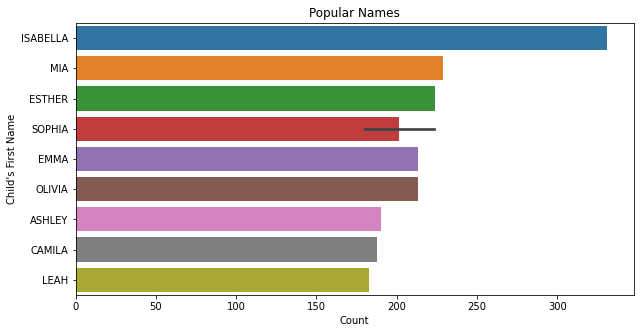

In [27]:
plt.figure(figsize = (10, 5))
plt.title("Popular Names")
sns.color_palette("rocket", as_cmap = True)
sns.barplot(y="Child's First Name",x="Count", data = Y2011dftop)